In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
def explorar_dataframe(df):
    # Mostrar las primeras 5 filas del DataFrame
    print("Primeras 5 filas del DataFrame:")
    print(df.head())
    print("\n")

    

1 - Análisis descriptivo del fichero de entrenamiento.

2 - Análisis del fichero de test (¿Existen diferencias significativas?)

3 - Definición de los objetivos del problema.

4 - Feature importance (MDI, MDA)

5 - Selección de modelo (Probar con los modelos que hemos visto hasta ahora, cada persona prueba uno)

6 - Discusión de resultados

In [15]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [16]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

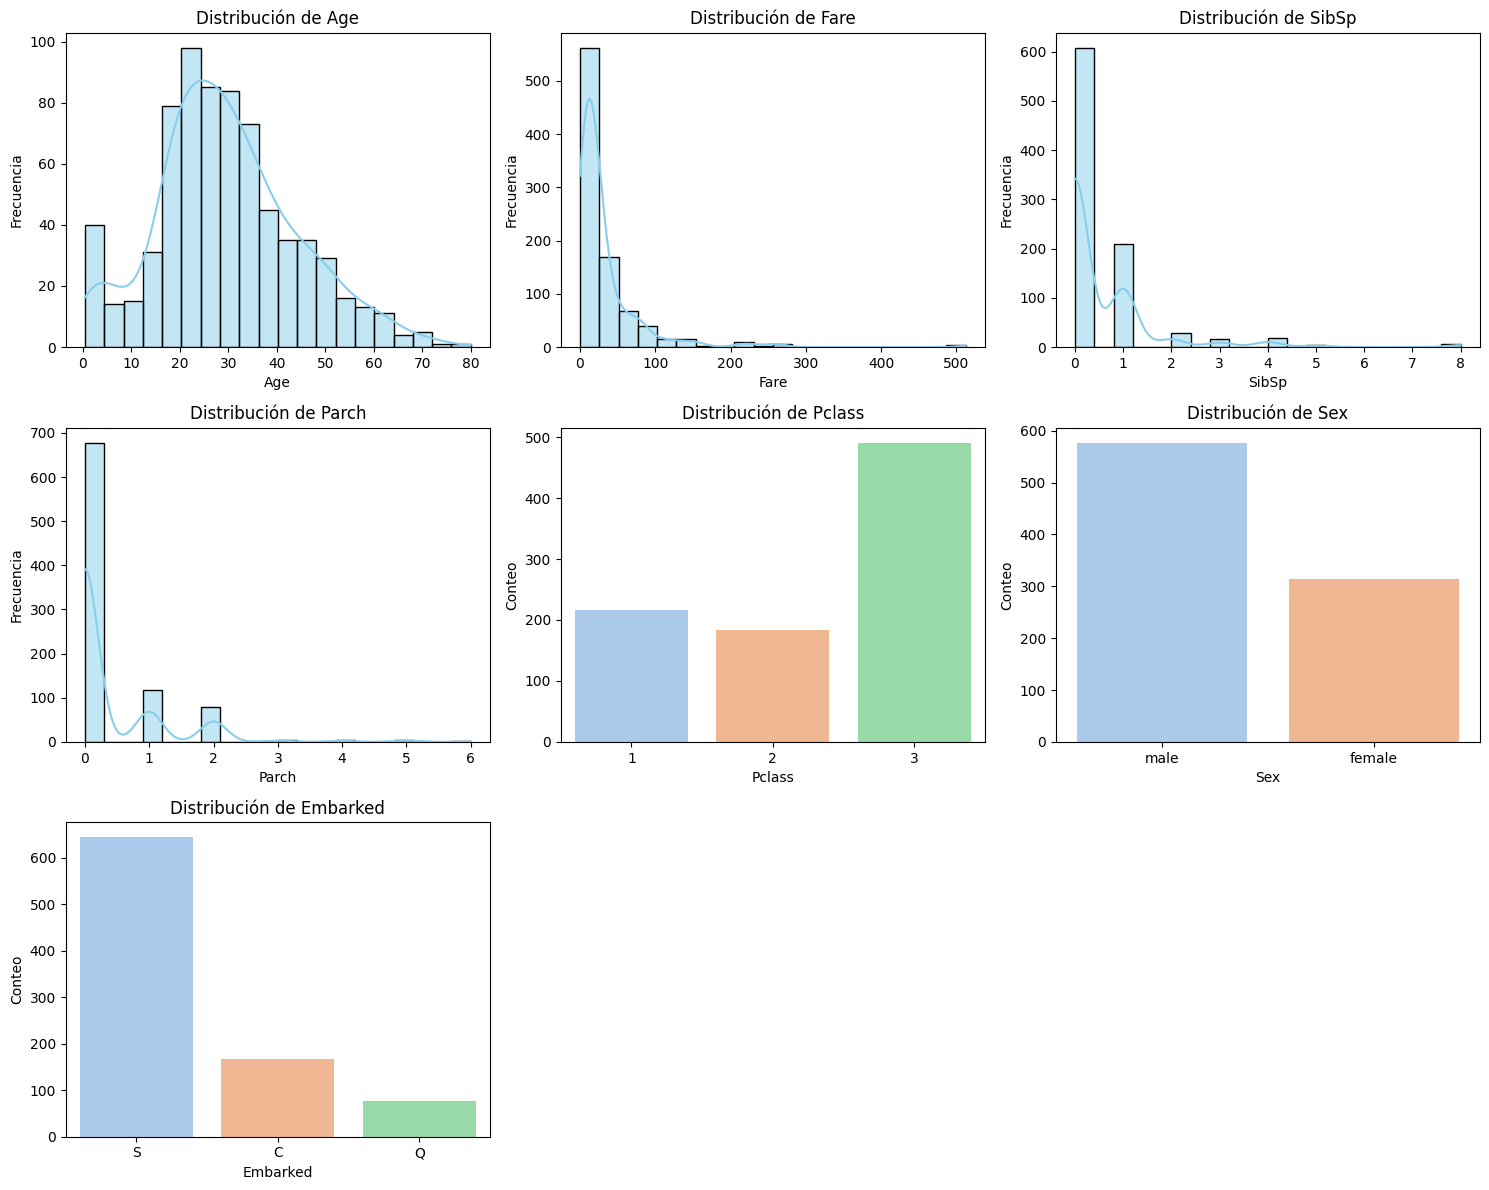

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos para visualizar las distribuciones de los datos
def visualizar_distribuciones(df):
    # Configurar el tamaño de la figura
    plt.figure(figsize=(15, 12))
    
    # Crear histogramas para las columnas numéricas
    columnas_numericas = ['Age', 'Fare', 'SibSp', 'Parch']
    for i, columna in enumerate(columnas_numericas, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[columna].dropna(), bins=20, kde=True, color='skyblue')
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
    
    # Crear gráficos de barras para las columnas categóricas
    columnas_categoricas = ['Pclass', 'Sex', 'Embarked']
    for i, columna in enumerate(columnas_categoricas, len(columnas_numericas) + 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=columna, palette='pastel')
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Conteo')
    
    # Ajustar el diseño para que no se superpongan los gráficos
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar las distribuciones
visualizar_distribuciones(df_train)

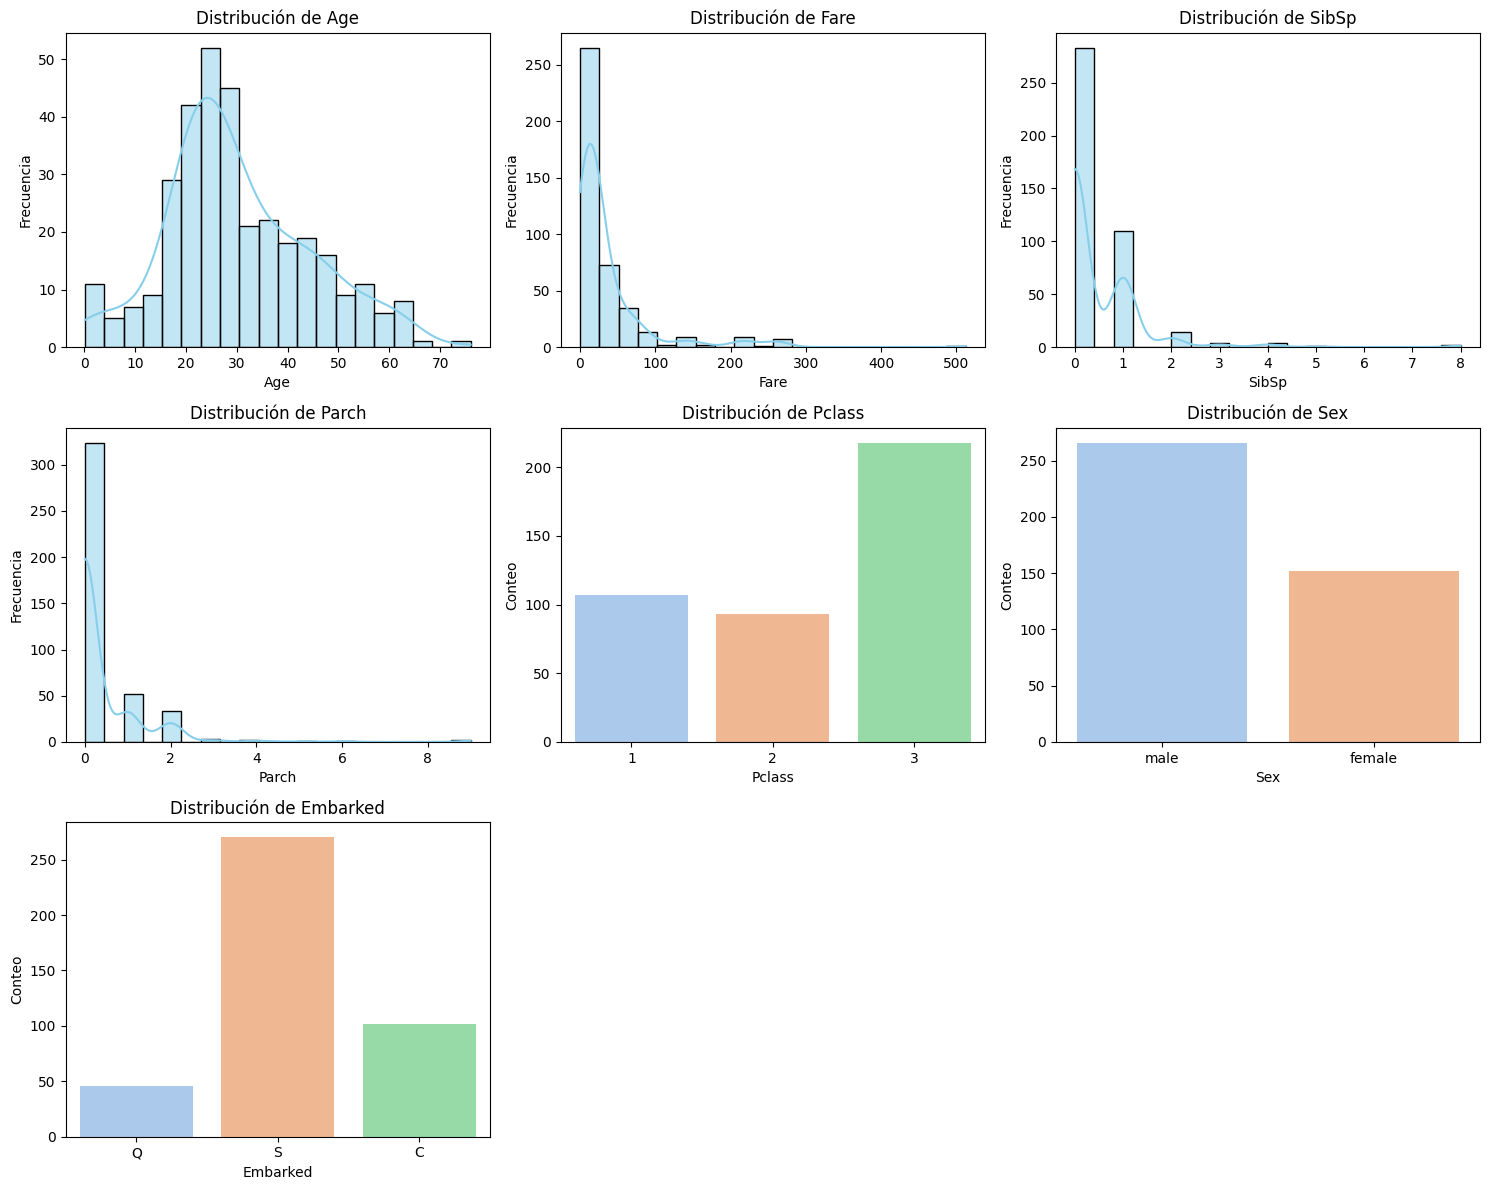

In [30]:
visualizar_distribuciones(df_test)

Correlaciones con 'Survived':
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


/tmp/ipykernel_253868/3627368949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df_train.corr()


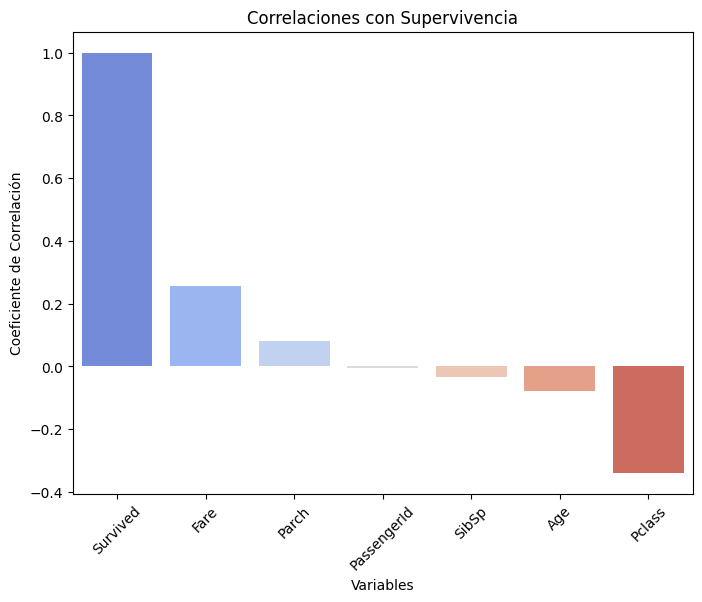

In [34]:
# Calcular la tabla de correlaciones
correlaciones = df_train.corr()

# Extraer las correlaciones con respecto a 'Survived'
correlacion_survived = correlaciones['Survived'].sort_values(ascending=False)

# Mostrar las correlaciones con 'Survived'
print("Correlaciones con 'Survived':")
print(correlacion_survived)

# Visualizar las correlaciones con 'Survived' usando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacion_survived.index, y=correlacion_survived.values, palette='coolwarm')
plt.title('Correlaciones con Supervivencia')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_253868/1936300384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df_train.corr()


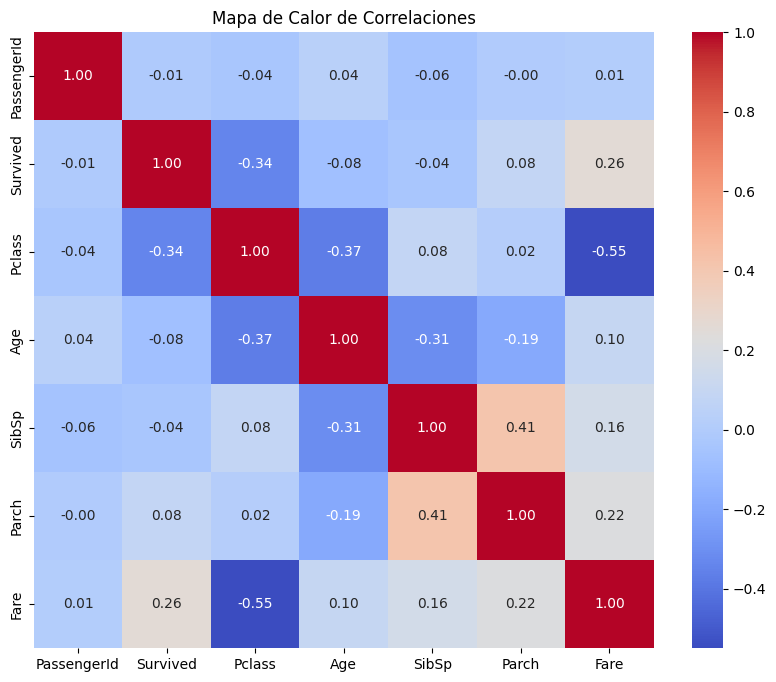

In [35]:
# Calcular la tabla de correlaciones
correlaciones = df_train.corr()

# Visualizar la tabla de correlaciones con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

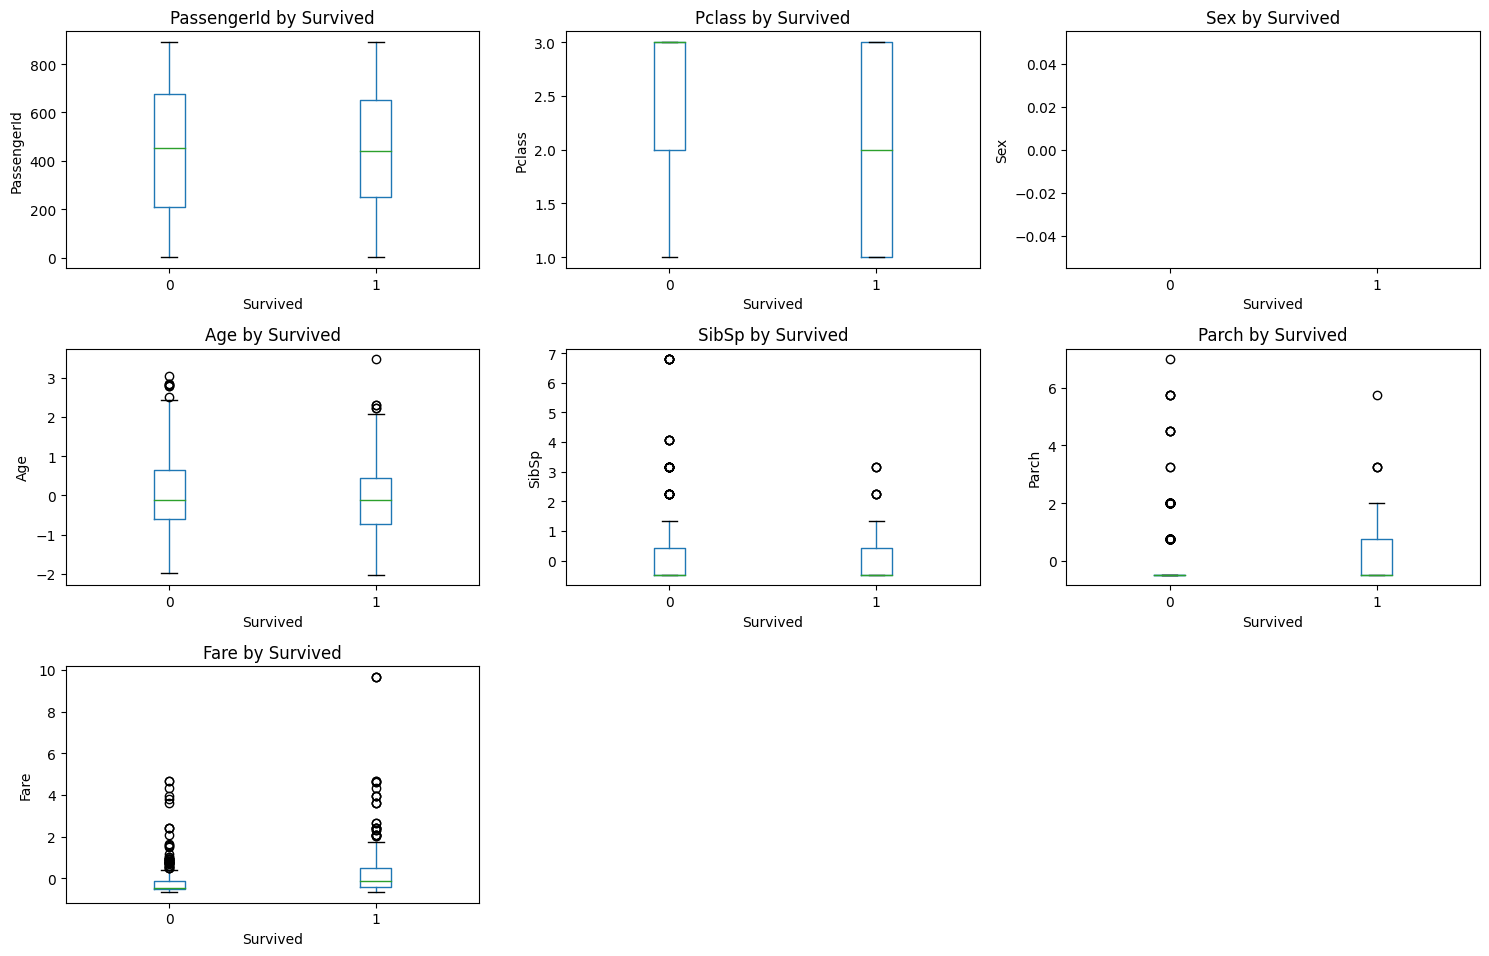

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_train es tu DataFrame y 'Survived' es la columna de resultado
# Selecciona solo las columnas numéricas
columns = df_train.select_dtypes(include=['float64', 'int64']).columns.drop('Survived')
outcome = df_train['Survived']

# Configurar el número de filas y columnas de subplots
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de caja por cada columna
for i, col in enumerate(columns):
    ax = axes[i]
    df_train.boxplot(column=[col], by='Survived', ax=ax, grid=False)
    ax.set_title(f'{col} by Survived')
    ax.set_xlabel('Survived')
    ax.set_ylabel(col)

# Quitar gráficos sobrantes si hay menos columnas que subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.suptitle('')  # Eliminar el título superpuesto por defecto
plt.show()

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# Cargar el dataset
df = pd.read_csv('train.csv')

# Preprocesamiento de datos
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Seleccionar características y objetivo
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Codificar variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']),
        ('cat', OneHotEncoder(), ['Embarked'])
    ])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de bosque aleatorio
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Obtener la importancia de las características (MDI)
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
mdi_importances = pd.Series(importances, index=feature_names)

print("Importancia de características (MDI):")
print(mdi_importances.sort_values(ascending=False))

# Transformar X_test
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)

# Calcular la importancia de características por permutación (MDA)
result = permutation_importance(model.named_steps['classifier'], X_test_transformed, y_test, n_repeats=30, random_state=42, n_jobs=-1)
mda_importances = pd.Series(result.importances_mean, index=feature_names)

print("Importancia de características (MDA):")
print(mda_importances.sort_values(ascending=False))

Accuracy: 0.81
Importancia de características (MDI):
num__Sex           0.279648
num__Fare          0.256427
num__Age           0.251878
num__Pclass        0.091026
num__SibSp         0.047176
num__Parch         0.035335
cat__Embarked_S    0.015578
cat__Embarked_C    0.013317
cat__Embarked_Q    0.009614
dtype: float64
Importancia de características (MDA):
num__Sex           0.187709
num__Pclass        0.052514
num__Fare          0.041713
num__Age           0.023277
cat__Embarked_S    0.008939
num__SibSp         0.008752
cat__Embarked_Q    0.004283
cat__Embarked_C    0.003166
num__Parch        -0.011546
dtype: float64
